$\newcommand{\si}{\sigma}
\newcommand{\al}{\alpha}
\newcommand{\tta}{\theta}
\newcommand{\Tta}{\Theta}
\newcommand{\Si}{\Sigma}
\newcommand{\ld}{\ldots}
\newcommand{\cd}{\cdots}
\newcommand{\Ga}{\Gamma} 
\newcommand{\bet}{\beta}
\newcommand{\cU}{\mathcal{U}}
\newcommand{\cN}{\mathcal{N}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\p}{\mathbb{P}}
\newcommand{\f}{\frac}
\newcommand{\ff}{\frac{1}}
\newcommand{\ds}{\displaystyle}
\newcommand{\bE}{\mathbf{E}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\bF}{\mathbf{F}}
\newcommand{\ii}{\mathrm{i}}
\newcommand{\me}{\mathrm{e}}
\newcommand{\hsi}{\hat{\sigma}}
\newcommand{\hmu}{\hat{\mu}}
\newcommand{\ste}{\, ;\, }
\newcommand{\op}{\operatorname} 
\newcommand{\argmax}{\op{argmax}}
\newcommand{\lfl}{\lfloor}
\newcommand{\ri}{\right}
\newcommand{\supp}{\operatorname{supp}}$

# TP Recuit simulé pour le problème du voyageur de commerce

## Voyageur de commerce

Dans ce TP, on s'intéresse au problème du [voyageur de commerce](https://fr.wikipedia.org/wiki/Problème_du_voyageur_de_commerce). Etant données $n$ villes, positionnées dans l'espace en positions $V_1, \ld, V_n$, le problème consiste à trouver une tournée de longueur minimale, c'est-à-dire une permutation $x$ du groupe symétrique $S_n$ minimisant la fonction
 $$
x \in S_n \longmapsto H(x) := \sum_{i=1}^n\op{dist} (V_{x(i)}, V_{x(i+1)})\;\;\text{ où }\; x(n + 1) := x(1).
$$
La longueur d'une tournée joue le rôle d'énergie ici. 

Ce problème d'optimisation est très simple à décrire mais particulièrement difficile à résoudre.
Une méthode simple consisterait à calculer $H(x)$ pour toutes les permutations $x$. 
Mais lorsque $n$ est élevé, cette méthode est irréalisable. C'est le cas  dès que le nombre de villes dépasse la dizaine : le cardinal de $S_n$ est de $n!$ (par exemple,  pour $n=30$, $n!\simeq 2.10^{32}$).

Pour essayer de minimiser H, on propose d'appliquer l'algorithme de recuit simulé en se déplaçant sur  $S_n$ aléatoirement  de proche en proche, ce qui implique d'avoir, sur $S_n$, une notion d'*éléments voisins* (de *permutations voisines*). Par exemple, on peut considèrer comme voisines deux permutations qui se déduisent l'une de l'autre par la permutation de deux éléments seulement. Cette "notion de voisinage" fonctionne, mais dans notre algorithme, nous la remplaçons en fait par une autre, qui permet une convergence plus rapide : nous considérons deux permutations $(x_1,\ldots, x_n)$, $(y_1,\ldots, y_n)$ comme voisines si il existe $1\leq i<k\leq n$ tels que $$(y_1,\ldots, y_n)=(x_1,\ldots, x_{i-1},x_k,x_{k-1},\ldots, x_{i+1},x_i,x_{k+1},\ldots, x_n).$$Par exemple, pour $n=8$, les permutations $$(1,2,3,4,8,7,6,5)\quad\textrm{ et }\quad (1,2,7,8,4,3,6,5)$$ sont voisines (avec $i=3,k=6$). 

## Rappel sur le recuit simulé

On rappelle l'**algorithme du recuit simulé**  de détermination de $x_{\min}$ tel que $$H(x_{\min})\approx \min_E H.$$
 
**Algorithme  du recuit simulé**
1. Choisir un noyau de transition $Q$ irréductible apériodique sur $E$ vérifiant $Q(x,y)=Q(y,x)$ et une fonction $t\mapsto\bet_t$ tendant vers $+\infty$ lentement comme, par exemple $c\log t$.
2. Choisir $x_0\in E$.
3. Répéter un grand nombre de fois :
   + tirer, indépendamment, $Y\sim Q(x_t,\cdot)$ et $U\sim\cU([0,1])$,
   + poser $x_{t+1}=y$ si   $U\le \me^{-\bet_t(H(y)-H(x))}$ et $x_{t+1}=x_t$ sinon.
4. Rendre $x_{\min}:=x_t$.


## Exercice

On souhaite implémenter l'algorithme précédent pour trouver une solution au problème du voyageur de commerce, pour diverses configurations de villes. 

On commence par importer les librairies nécessaires, et choisir les paramètres qui seront utilisés dans le reste du TP. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from TP_commerce import *

In [3]:
#paramètres
N=100 #nombre de villes
c=2. #pour beta(t)=c*np.log(t)
Npas=int(2e4)

On va maintenant construire une configuration de villes à l'aide du code suivant, qui prend en entrée une suite de caractères permettant d'identifier quelle configuration on veut construire. On a le choix parmi : "circle","grid","approximategrid","doublecircle","randomsquare","randomGaussian","randomcauchy","approximatecircle","Ginibre".

Le code renvoie deux tableaux `Xvilles` et `Yvilles` avec les coordonnées des villes. 


In [4]:
def construction_villes(N,Configuration = "doublecircle"):
    #choisir parmi ["circle","grid","approximategrid","doublecircle","randomsquare","randomGaussian","randomcauchy","approximatecircle","Ginibre"]
    if Configuration=="circle":
        Xvilles=np.cos((2*np.pi/N)*np.arange(N))
        Yvilles=np.sin((2*np.pi/N)*np.arange(N))
    elif Configuration=="grid":
        M=int(round(np.sqrt(N)))
        N=M**2
        Xvilles=np.array([i for i in range(M)]*M)
        Yvilles=[]
        for j in range(M):
            Yvilles+=[j]*M  
        Yvilles=np.array(Yvilles)
    elif Configuration=="approximategrid":
        r=.25
        M=int(round(np.sqrt(N)))
        N=M**2
        Xvilles=np.array([i for i in range(M)]*M)+.0
        Xvilles+=r*np.random.randn(N)
        Yvilles=[]
        for j in range(M):
            Yvilles+=[j]*M  
        Yvilles=np.array(Yvilles)+r*np.random.randn(N)
    elif Configuration=="doublecircle":
        r=.5
        if N%2==1:
            N+=1    
        Xvilles=np.cos((2*np.pi/N)*np.arange(N))
        Yvilles=np.sin((2*np.pi/N)*np.arange(N))
        for k in range(int(N/2)):
            Xvilles[2*k]*=r
            Yvilles[2*k]*=r
    elif Configuration=="randomsquare":
        Xvilles=np.random.rand(N)
        Yvilles=np.random.rand(N)
    elif Configuration=="randomGaussian":
        Xvilles=np.random.randn(N)
        Yvilles=np.random.randn(N)
    elif Configuration=="randomcauchy":
        Xvilles=np.tan(np.pi*np.random.rand(N)-.5*np.pi)
        Yvilles=np.tan(np.pi*np.random.rand(N)-.5*np.pi)
    elif Configuration=="approximatecircle":
        r,R=.8,1.2
        Xvilles=np.cos((2*np.pi/N)*np.arange(N))
        Yvilles=np.sin((2*np.pi/N)*np.arange(N))
        for k in range(N):
            rho=r+(R-r)*np.random.rand()
            Xvilles[k]*=rho
            Yvilles[k]*=rho
    elif Configuration=="Ginibre":
        M=np.random.randn(N,N)+1j*np.random.randn(N,N)
        z=np.linalg.eigvals(M)
        Xvilles=np.array([k.real for k in z])
        Yvilles=np.array([k.imag for k in z])
    
    return Xvilles,Yvilles 

1. **Tester plusieurs configurations possibles et afficher les configurations correspondantes avec `plt.plot`** 

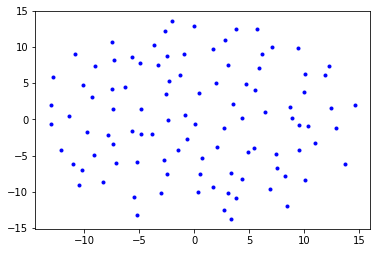

In [5]:
Xvilles,Yvilles = construction_villes(N,"Ginibre")
plt.plot(Xvilles,Yvilles,"b.")

2. **Calculez une matrice `Distance` contenant toutes les distances 2 à 2 entres les villes (si possible sans boucle for). En position $(i,j)$, la matrice contient la distance entre les villes $i$ et $j$.**

In [6]:
Distance = distance_villes(Xvilles,Yvilles)

3. **Tirer aléatoirement un trajet initial entre les villes (une permutation $x$ de $\{1,\dots,N\}$) à laide de la commande `np.random.permutation`, et affichez le trajet correspondant.**

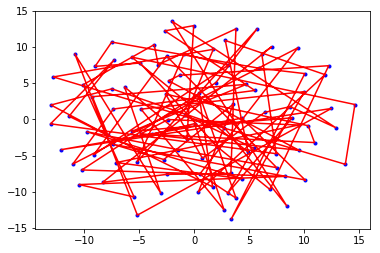

In [7]:
x = initialisation_trajet(N)
display_trajet(x,Xvilles,Yvilles)

3. **Ecrire une fonction qui à une permutation $x$ associe l'énergie $H(x)$ définie dans le texte. Implémenter l'algorithme du recuit simulé pour trouver une solution au problème du voyageur de commerce.**

In [8]:
x,Energies=recuitsimule(x,Distance,Npas,c)  

4. **Testez l'algorithme pour diverses configurations de villes et affichez le résultat final.** 

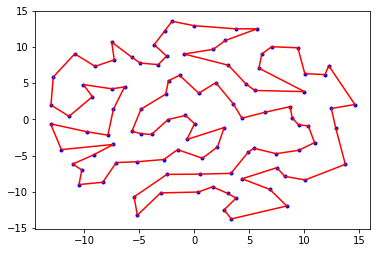

In [9]:
display_trajet(x,Xvilles,Yvilles)